In [1]:
import numpy as np
from qiskit.circuit.library import EfficientSU2
from tqdm import tqdm
import plotly.graph_objects as go
import plotly.express as px
from fidlib.basicfunctions import create_ising
from fidlib.variance import VarianceComputer,_abs2,kplus,a_const,bound

np.random.seed(1)
%load_ext autoreload
%autoreload 2

In [2]:

qc = EfficientSU2(num_qubits := 6,reps=(reps:=6))
times=(1e-1, 2)
vc = VarianceComputer(    qc=qc,    initial_parameters=None,    times=times,    H=create_ising(num_qubits=num_qubits, j_const=0.5, g_const=-1))


# omegas = np.logspace(-3, -1, 10)
omegas = np.linspace(1e-3,0.8,20)
variances = []
for o in tqdm(omegas):
    variances.append(vc.direct_compute_variance(400, o))

variances = np.array(variances)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:38<00:00,  1.91s/it]


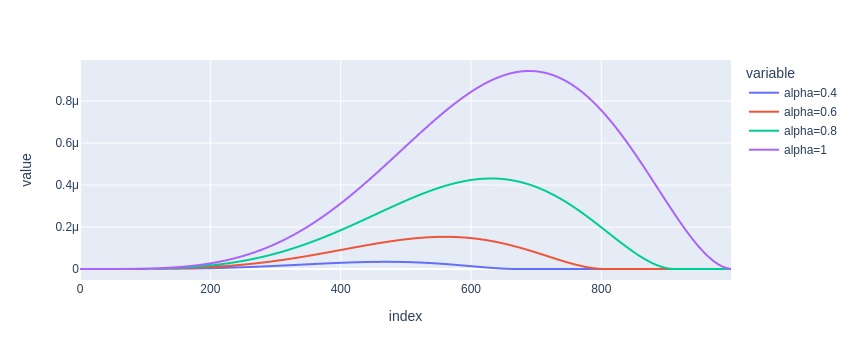

In [30]:
analytical_infidelities=[1-_abs2(np.inner(vc.evolved_states[0], vc.evolved_states[i].conj())) for i in range(times[1])]
# display(px.line(x=np.linspace(0,times[0],times[1]),y=analytical_infidelities))
xs=np.linspace(0.00001,0.12,1000)
vbound = np.vectorize(bound)

df = {f"alpha={alpha}":vbound(xs,alpha,qc.num_parameters) for alpha in [0.4,0.6,0.8,1]}

# display(px.line(x=xs,y=[kplus(x)**qc.num_parameters for x in xs]))
display(px.line(df))


(20,) (20, 2)


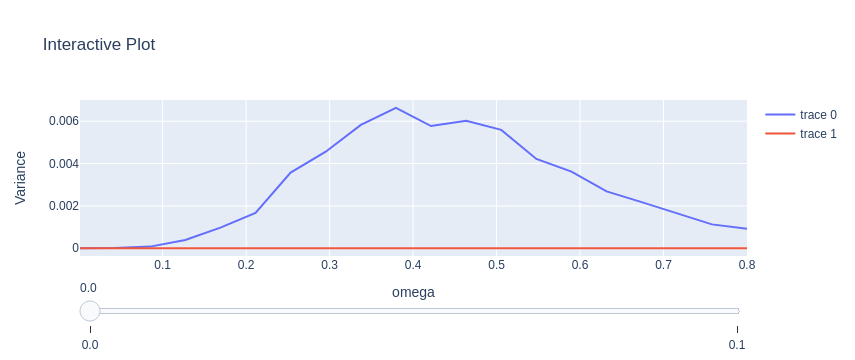

In [4]:
# Assuming data is your 2D numpy array
data = variances# Replace this with your actual data
bounded=np.array([bound(o,0.5,qc.num_parameters) for o in omegas])
print(bounded.shape,data.shape)
# Create steps for the slider, one for each slice along parameter 2
steps = []
for i in range(data.shape[1]):
    step = dict(
        method="restyle",
        args=[{"y": [data[:, i],bounded[:]]}],
        label=str(np.linspace(0,times[0],times[1])[i])
    )
    steps.append(step)

# Create an initial plot for the first slice of data along parameter 2
fig = go.Figure(
    data=[go.Scatter(x=omegas,y=data[:, 0]),go.Scatter(x=omegas,y=bounded[:])],
    layout=go.Layout(
        title="Interactive Plot",
        xaxis_title="omega",
        yaxis_title="Variance",
        sliders=[dict(
            active=0,
            pad={"t": 20},
            steps=steps,
        )],
        # yaxis_range=[np.min(data),1],
    )
)

# fig.update_yaxes(type="log")

# Display the interactive plot
fig.show()


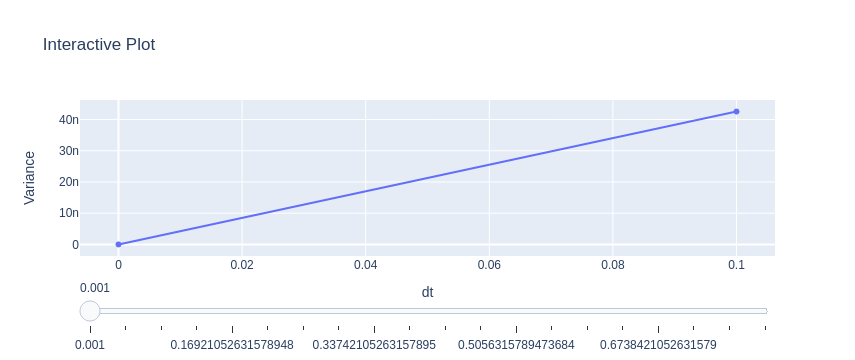

In [5]:
# Assuming data is your 2D numpy array
data = variances.T# Replace this with your actual data

# Create steps for the slider, one for each slice along parameter 2
steps = []
for i in range(data.shape[1]):
    step = dict(
        method="restyle",
        args=[{"y": [data[:, i]]}],
        label=str(omegas[i])
    )
    steps.append(step)

# Create an initial plot for the first slice of data along parameter 2
fig = go.Figure(
    data=[go.Scatter(x=np.linspace(0,times[0],times[1]),y=data[:, 0])],
    layout=go.Layout(
        title="Interactive Plot",
        xaxis_title="dt",
        yaxis_title="Variance",
        sliders=[dict(
            active=0,
            pad={"t": 20},
            steps=steps,
        )],
        # yaxis_range=[np.min(data),1],
    )
)

# fig.update_yaxes(type="log")


# Display the interactive plot
fig.show()
